**Основные цели этого задания:**
*   Научиться работать с новыми моделями: случайный лес, градиентный бустинг.
*   Научиться распознавать факты переобучения и недообучения модели.
*   Научить бороться с переобучением и недообучением модели путем варьирования ее гиперпараметров.

**Задача: Построить модель машинного обучения, предсказывающую, является ли вино красным по одиннадцати его характеристикам.**

*1. Загрузите данные, объедините источники в один датафрейм. Составьте целевую переменную на основе файла, из которого вы получили часть данных, изучите распределение по ней. Проверьте отсутствие пропусков в данных, отделите фичи и целевой признак друг от друга, разделите данные на обучающую и валидационную части.*

In [34]:
import pandas as pd
import numpy as np

from numpy import arange
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt

from imblearn.metrics import sensitivity_score, specificity_score

Сначала посмотрим оба файла по отдельности:

In [35]:
df_white = pd.read_csv('https://raw.githubusercontent.com/W1llAnn/1tdata-homework/main/2.3winequality-white.csv', delimiter=';')
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [36]:
df_red = pd.read_csv('https://raw.githubusercontent.com/W1llAnn/1tdata-homework/main/2.3winequality-red.csv', delimiter=';')
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [37]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [38]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Пропусков нет, колонки имеют одинаковое название. Но нам не хватает столбца, где будет записано является вино красным или белым. Создадим такой столбец и объединим.

In [39]:
df_red['wine_red'] = 1
df_white['wine_red'] = 0

Если вино красное то значение будет 1, если нет 0

In [40]:
frames = [df_red, df_white]
df_merged = pd.concat(frames)

In [41]:
df_merged.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [42]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_red              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [43]:
print(f'Проверяем количество строк: {4898 + 1599} = 6497')

Проверяем количество строк: 6497 = 6497


Строки не "потерялись", можем продолжать

In [44]:
df_merged['wine_red'].value_counts()

wine_red
0    4898
1    1599
Name: count, dtype: int64

Как и предполагалось, в выборке количество строк с красным вином больше практически в 3 раза, чем белого

In [45]:
X = df_merged.drop(['wine_red'], axis=1)
y = df_merged['wine_red']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)

Разделили выборку на обучающую и тестовую

*2. Поскольку выборка несбалансирована, воспользуемся для оценки качества модели новой метрикой balanced_accuracy_score. Изучите формулу расчета метрики в документации и реализуйте функцию balanced_accuracy_score_my для ее расчета. На вход она должна принимать правильные и прогнозные метки классов, а возвращать число от 0 до 1. Убедитесь, что вы корректно реализовали расчет, сравнив значения, получаемые библиотечной реализацией и собственной, подавая на вход векторы:   y_true = [0, 1, 1, 1, 1, 1, 1, 0, 1]   y_pred = [1, 0, 1, 1, 1, 1, 0, 0, 1]*

In [46]:
def balanced_accuracy_score_my(y_true, y_pred):

    #Sensitivity= TP / (TP + FN)       Specificity =TN / (TN + FP)
    sensitivity = sensitivity_score(y_true, y_pred, average='binary')
    specificity = specificity_score(y_true, y_pred, average='binary')
    balanced_accuracy = (sensitivity + specificity) / 2
    return balanced_accuracy

Мы воспользуемся этой функцией позже

*3. Подберите лучшую модель решающего дерева:*
*   Переберите несколько значений какого-либо гиперпараметра, отвечающего за сложность дерева, для каждого значения оцените качество на обучающей и валидационной частях
*   Визуализируйте зависимость качества модели от значения гиперпараметров. Опишите зоны недообучения и переобучения, если вы их наблюдаете.
*   Выведите значение гиперпараметра, при котором качество модели на валидационной части наилучшее. 

Возьмем очень сложное дерево:

In [41]:
model_1 = DecisionTreeRegressor(min_samples_leaf=1, random_state=1)

model_1.fit(X_train, y_train)
pred_train = model_1.predict(X_train)
pred_test = model_1.predict(X_test)

print(f'Качество на обучающей выборке: {mean_absolute_error(pred_train, y_train)}')
print(f'Качество на валидационной выборке: {mean_absolute_error(pred_test, y_test)}')

Качество на обучающей выборке: 0.00025655827079725484
Качество на валидационной выборке: 0.011538461538461539


In [42]:
model_1.get_depth()

22

In [43]:
balanced_accuracy_score_my(y_test, pred_test)

0.9870854591836735

In [44]:
model_1.score(X_test, y_test)

0.9378188775510204

Глубина дерева 22, однако модель дала хороший результат и на обучающей и на тестовой выборке, что говорит об обученной модели и отсутствия недообучения или переобучения. balanced_accuracy_score достаточно высокое значение

Понаблюдаем как меняются ошибки в зависимости от сложности алгоритма

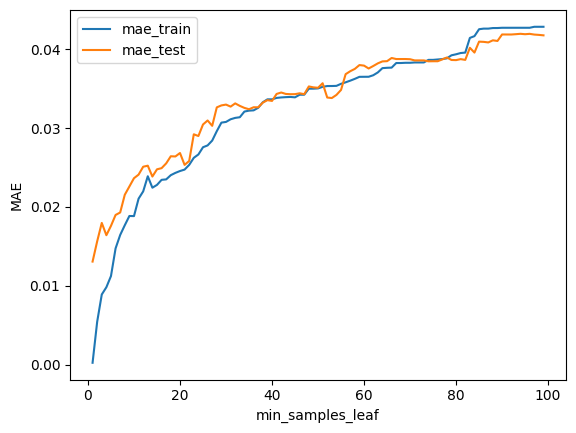

In [45]:
res = []
for param in range(1, 100, 1):
    model_2 = DecisionTreeRegressor(min_samples_leaf=param, random_state=42)

    model_2.fit(X_train, y_train)
    pred_train = model_2.predict(X_train)
    pred_test = model_2.predict(X_test)

    res.append([param, mean_absolute_error(pred_train, y_train), mean_absolute_error(pred_test, y_test)])
    
res_pd = pd.DataFrame(res, columns=['min_samples_leaf', 'mae_train', 'mae_test'])

res_pd.set_index('min_samples_leaf')['mae_train'].plot(label='mae_train')
res_pd.set_index('min_samples_leaf')['mae_test'].plot(label='mae_test')
plt.legend()
plt.ylabel('MAE');

In [46]:
res_pd[res_pd['mae_test'] == res_pd['mae_test'].min()]

,min_samples_leaf,mae_train,mae_test
0,1,0.000257,0.013077


Получается, что min_samples_leaf должен быть равен 1, тогда достигаются наилучшие значения mae

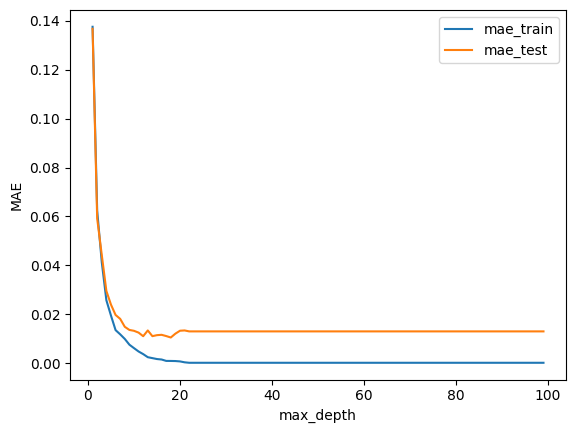

In [47]:
res_2 = []
for param in range(1, 100, 1):
    model_2 = DecisionTreeRegressor(max_depth=param, random_state=42)

    model_2.fit(X_train, y_train)
    pred_train2 = model_2.predict(X_train)
    pred_test2 = model_2.predict(X_test)

    res_2.append([param, mean_absolute_error(pred_train2, y_train), mean_absolute_error(pred_test2, y_test)])
    
res2_pd = pd.DataFrame(res_2, columns=['max_depth', 'mae_train', 'mae_test'])

res2_pd.set_index('max_depth')['mae_train'].plot(label='mae_train')
res2_pd.set_index('max_depth')['mae_test'].plot(label='mae_test')
plt.legend()
plt.ylabel('MAE');

In [48]:
res2_pd[res2_pd['mae_test'] == res2_pd['mae_test'].min()]

,max_depth,mae_train,mae_test
17,18,0.001004,0.01058


In [55]:
balanced_accuracy_score_my(y_test, pred_test2)

0.9850127551020408

Максимальная глубина дерева 18, при ней наблюдается самая низкая mae и высокая точность модели

*4. Подберите лучшую модель случайного леса:*
*   Переберите несколько значений какого-либо гиперпараметра дерева и для каждого из них — несколько значений гиперпараметра, отвечающего за количество решающих деревьев в случайном лесу. Для каждой комбинации гиперпараметров оцените качество на валидационной части.
*   Визуализируйте зависимость качества модели от значений гиперпараметров с помощью функции imshow. Опишите особенности, которые вы наблюдаете.
*   Выведите значения гиперпараметров, при которых качество модели на валидационной части выборки наилучшее.

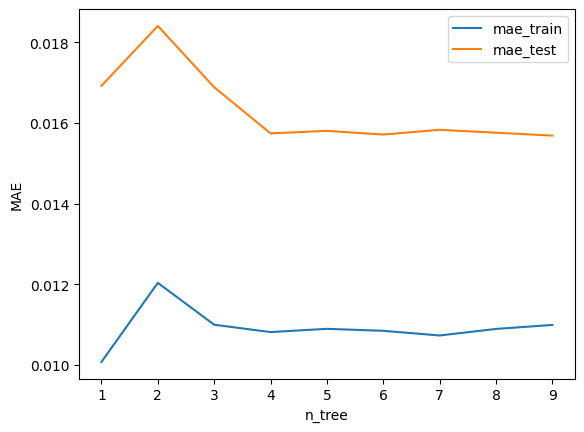

In [63]:
res_3 = []
for n_tree in range(1, 10):
    model_3 = RandomForestRegressor(n_estimators=n_tree, min_samples_leaf=2, random_state=7)

    model_3.fit(X_train, y_train)
    pred_train3 = model_3.predict(X_train)
    pred_test3 = model_3.predict(X_test)

    res_3.append([n_tree, mean_absolute_error(pred_train3, y_train), mean_absolute_error(pred_test3, y_test)])

res3_pd = pd.DataFrame(res_3, columns=['n_tree', 'mae_train', 'mae_test'])

res3_pd.set_index('n_tree')['mae_train'].plot(label='mae_train')
res3_pd.set_index('n_tree')['mae_test'].plot(label='mae_test')
plt.legend()
plt.ylabel('MAE');

In [64]:
res3_pd[res3_pd['mae_test'] == res3_pd['mae_test'].min()]

,n_tree,mae_train,mae_test
8,9,0.010988,0.015688


Минимальное количество деревьев - 9 при min_samples_leaf = 2.

In [47]:
model_4 = RandomForestRegressor(min_samples_leaf=2, n_estimators=9, max_depth=10)

model_4.fit(X_train, y_train)
pred_train4 = model_4.predict(X_train)
pred_test4 = model_4.predict(X_test)

print(f'Качество на обучающей выборке: {mean_absolute_error(pred_train4, y_train)}')
print(f'Качество на валидационной выборке: {mean_absolute_error(pred_test4, y_test)}')

Качество на обучающей выборке: 0.01228960828572855
Качество на валидационной выборке: 0.014288715929871243


In [101]:
model_4.score(X_test, y_test)

0.9720166347324866

Максимальная количество деревьев 9, а min_samples_leaf 2, при этом наблюдается самая низкая mae и высокая точность модели

*5. Подберите лучший вариант градиентного бустинга:*
*   Выделите из обучающей части данных часть для валидации градиентного бустинга в ходе обучения.
*   Зафиксируйте небольшое количество деревьев, значение какого-либо параметра, отвечающего за сложность решающих деревьев и значение величины шага градиентного бустинга. Обучите градиентный бустинг с выбранными параметрами, выводя в процессе обучения значение функции потерь на обучающей и валидационной частях. Выведите значение метрики качества на экран.
*   На фиксированном небольшом количестве деревьев сравните 3-4 комбинации значений параметров величины шага градиентного бустинга и какого-либо параметра, отвечающего за сложность решающих деревьев.
*   Выберите из рассмотренных комбинаций лучшую и обоснуйте свой выбор.
*   Увеличьте количество деревьев и опишите эффект. Изучите значение гиперпараметра early_stopping_rounds и воспользуйтесь им, чтобы сэкономить время, войдя в переобучение модели.

In [14]:
from xgboost import XGBRegressor

In [20]:
features_train_xgb, features_val, target_train_xgb, target_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

[0]	validation_0-rmse:0.45741	validation_1-rmse:0.45770
[1]	validation_0-rmse:0.41880	validation_1-rmse:0.41949
[2]	validation_0-rmse:0.38384	validation_1-rmse:0.38499
[3]	validation_0-rmse:0.35240	validation_1-rmse:0.35349
[4]	validation_0-rmse:0.32383	validation_1-rmse:0.32504
[5]	validation_0-rmse:0.29722	validation_1-rmse:0.29860
[6]	validation_0-rmse:0.27333	validation_1-rmse:0.27504
[7]	validation_0-rmse:0.25163	validation_1-rmse:0.25353


[8]	validation_0-rmse:0.23209	validation_1-rmse:0.23418
[9]	validation_0-rmse:0.21448	validation_1-rmse:0.21693
[10]	validation_0-rmse:0.19859	validation_1-rmse:0.20151
[11]	validation_0-rmse:0.18444	validation_1-rmse:0.18767
[12]	validation_0-rmse:0.17190	validation_1-rmse:0.17570
[13]	validation_0-rmse:0.16038	validation_1-rmse:0.16491
[14]	validation_0-rmse:0.15017	validation_1-rmse:0.15524
[15]	validation_0-rmse:0.14122	validation_1-rmse:0.14683
[16]	validation_0-rmse:0.13338	validation_1-rmse:0.13944
[17]	validation_0-rmse:0.12622	validation_1-rmse:0.13294
[18]	validation_0-rmse:0.12006	validation_1-rmse:0.12718
[19]	validation_0-rmse:0.11407	validation_1-rmse:0.12133
[20]	validation_0-rmse:0.10896	validation_1-rmse:0.11602
[21]	validation_0-rmse:0.10435	validation_1-rmse:0.11161
[22]	validation_0-rmse:0.10041	validation_1-rmse:0.10766
[23]	validation_0-rmse:0.09683	validation_1-rmse:0.10433
[24]	validation_0-rmse:0.09347	validation_1-rmse:0.10130
[25]	validation_0-rmse:0.09069	va

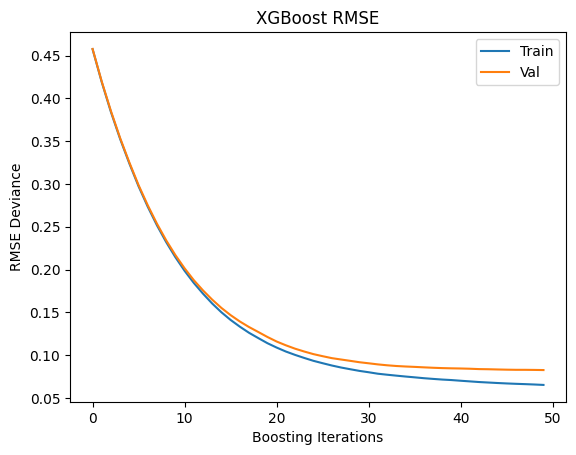

In [31]:
model_xgb = XGBRegressor(n_estimators=50, max_depth=4, learning_rate=0.09)

model_xgb.fit(features_train_xgb, target_train_xgb, eval_set= [(features_train_xgb, target_train_xgb), (features_val, target_val)])
pred_train_xgb = model_xgb.predict(X_train)
pred_test_xgb = model_xgb.predict(X_test)

print(f'Ошибка на обучающей выборке: {mean_absolute_error(pred_train_xgb, y_train)}')
print(f'Ошибка на валидационной выборке: {mean_absolute_error(pred_test_xgb, y_test)}')

epochs = len(model_xgb.evals_result()['validation_0']['rmse'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()

ax.plot(x_axis, model_xgb.evals_result()['validation_0']['rmse'], label='Train')
ax.plot(x_axis, model_xgb.evals_result()['validation_1']['rmse'], label='Val')

plt.title('XGBoost RMSE')
plt.xlabel("Boosting Iterations")
plt.ylabel("RMSE Deviance")
plt.legend(loc="upper right");

In [32]:
model_xgb.score(X_test, y_test)

0.9675479721701173

Максимальная точность модели достигается n_estimators=50 (количество) и max_depth=4 (максимальной глубиной)

*6. В выводах напишите, какая модель показала себя лучше всего, какого качества удалось достичь.*

Мы посмотрели следующие модели:
*   DecisionTreeRegressor    глубина решающего дерева 22
*   DecisionTreeRegressor    min_samples_leaf=1 max_depth=18
*   RandomForestRegressor    Минимальное количество деревьев - 9 при min_samples_leaf = 2.
*   XGBRegressor    n_estimators=50 (количество) и max_depth=4 (максимальной глубиной)

Так как мы подбирали наилучшие параметры для каждой модели, то все они показывали себя "хорошо", качество у каждой было высокое, также как и MAE. Но например если ограничить модель DecisionTreeRegressor глубиной, например 3, то качество сильно упадет. 